Dowanload atmospheric sounding data from University of Wyoming.

In [39]:
import httplib
import urllib2
import re
from datetime import datetime

https://docs.python.org/2/library/httplib.html

In [2]:
year, month, day = 2015, 4, 22
stationnum = '08302'

In [21]:
baseurl = 'http://weather.uwyo.edu/cgi-bin/sounding?region=europe&TYPE=TEXT%3ALIST&YEAR='
dataurl1 = (baseurl + str(year) + '&MONTH=' + str(month).zfill(2) + 
            '&FROM=' + str(day).zfill(2) +'00' + '&TO=' + str(day).zfill(2) 
            + '00' + '&STNM=' + stationnum)
dataurl2 = (baseurl + str(year) + '&MONTH=' + str(month).zfill(2) + 
            '&FROM=' + str(day).zfill(2) +'12' + '&TO=' + str(day).zfill(2) 
            + '12' + '&STNM=' + stationnum)
print dataurl1
datafile = '/home/ctroupin/Projects/1-Internal/201530627_Rissaga/sounding201504_Palma.html'

http://weather.uwyo.edu/cgi-bin/sounding?region=europe&TYPE=TEXT%3ALIST&YEAR=2015&MONTH=04&FROM=2200&TO=2200&STNM=08302


In [20]:
timelist = []
capelist = []
Klist = []
#data = urllib2.urlopen(dataurl)
data = open(datafile, 'r')
for lines in data.readlines():
    match = re.search(r'Observation time: (\d{6})/(\d{4})', lines)
    match2 = re.search(r'Convective Available Potential Energy: (\d+)', lines)
    match3 = re.search(r'K index: (\-?\d+.\d+)', lines)
    if match:
        yymmdd = match.group(1)
        hhhh = match.group(2)
        dd = datetime(2000 + int(yymmdd[:2]), int(yymmdd[2:4]), int(yymmdd[4:6]), int(hhhh[:2]), int(hhhh[2:4]), 0)
        timelist.append(dd)
    if match2:
        capelist.append(match2.group(1))
    if match3:
        Klist.append(match3.group(1))
data.close()

NameError: name 're' is not defined

In [70]:
print len(Klist)
print len(capelist)

58
58


In [71]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline

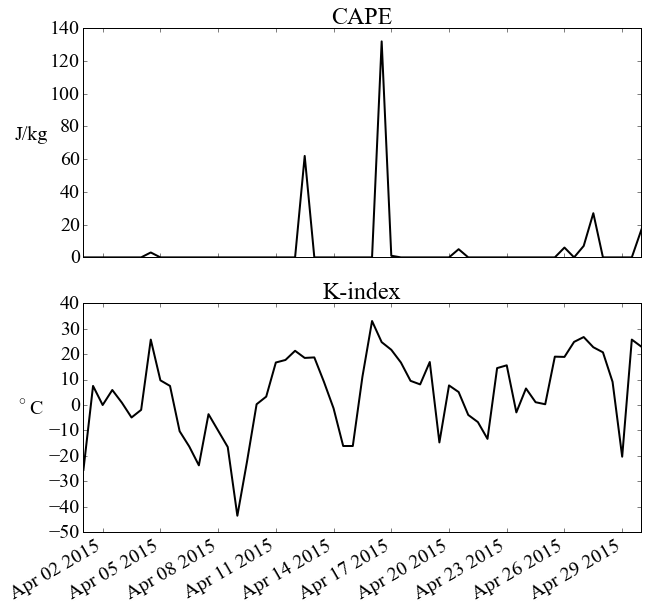

In [75]:
mpl.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(211)
plt.plot(timelist, np.array(capelist))
plt.ylabel('J/kg', rotation=0, horizontalalignment='right')
plt.title('CAPE')
ax = plt.subplot(212)
plt.plot(timelist, np.array(Klist))
plt.ylabel('$^{\circ}$C', rotation=0, horizontalalignment='right')
plt.title('K-index')
plt.gcf().autofmt_xdate()
plt.show()